<a href="https://colab.research.google.com/github/byOKO/Deep_Learning/blob/main/02_MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 두번째 실습. Keras 모델 생성/학습 - MNIST : CNN
[Keras Dataset](https://keras.io/ko/datasets/#mnist)

In [ ]:
# 1. 데이터 불러오기
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


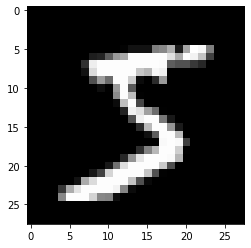

In [ ]:
# 2. 이미지 데이터 확인하기 🖼
import matplotlib.pyplot as plt

image_show = X_train[0]
plt.imshow(image_show, cmap=plt.cm.gray)

In [ ]:
# 3-1. 이미지 데이터 전처리 : 2차원->3차원 🌟🌟🌟

X_train_reshaped = X_train.reshape((-1,28,28,1))
X_test_reshaped = X_test.reshape((-1,28,28,1))

print(X_train_reshaped.shape)
print(X_test_reshaped.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
# 3-2. 이미지 데이터 전처리 : Normalzation 

X_train_reshaped = X_train_reshaped/255
X_test_reshaped = X_test_reshaped/255

In [ ]:
# 4. Label 전처리 (one-hot encoding) 
from keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [ ]:
# 5. 모델 생성 : CNN 🌟🌟🌟
from tensorflow import keras
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

model = keras.Sequential()
#convolution layer 만들기
model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 padding='same', # <-> valid 지금 이미지는 edge 정보가 그닥 필요 없어서 same으로 할 필요 없음
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(Conv2D(32, (3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))# 가로 세로 2분의 1씩 줄이겠다
#컨벌-컨벌-맥스 똑같이 한 번 더해도 됨
model.add(Conv2D())
model.add(Flatten())
model.add(Dense(units=256,activation='relu'))
#출력층
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1605888   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 1,618,026
Trainable params: 1,618,026
Non-trainable params: 0
______________________________________________

In [ ]:
# 6. Compile - Optimizer, Loss function 설정

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# 7. 모델 학습시키기
batch_size = 64
epochs = 50

history = model.fit(X_train_reshaped, y_train_encoded,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.2)

Epoch 1/50
750/750 [==============================] - 3s 4ms/step - loss: 0.5940 - accuracy: 0.8334 - val_loss: 0.2691 - val_accuracy: 0.9156
Epoch 2/50
750/750 [==============================] - 3s 4ms/step - loss: 0.2137 - accuracy: 0.9358 - val_loss: 0.1757 - val_accuracy: 0.9510
Epoch 3/50
750/750 [==============================] - 3s 4ms/step - loss: 0.1580 - accuracy: 0.9525 - val_loss: 0.1620 - val_accuracy: 0.9515
Epoch 4/50
750/750 [==============================] - 3s 4ms/step - loss: 0.1258 - accuracy: 0.9626 - val_loss: 0.1289 - val_accuracy: 0.9622
Epoch 5/50
750/750 [==============================] - 3s 4ms/step - loss: 0.1073 - accuracy: 0.9668 - val_loss: 0.1106 - val_accuracy: 0.9678
Epoch 6/50
750/750 [==============================] - 3s 4ms/step - loss: 0.0941 - accuracy: 0.9714 - val_loss: 0.1091 - val_accuracy: 0.9666
Epoch 7/50
750/750 [==============================] - 3s 4ms/step - loss: 0.0839 - accuracy: 0.9740 - val_loss: 0.0908 - val_accuracy: 0.9726
Epoch 

In [ ]:
# 8. 모델 평가하기
loss_test, acc_test = model.evaluate(X_test_reshaped, y_test_encoded)

print(loss_test)
print(acc_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0615 - accuracy: 0.9844
0.061530426144599915
0.9843999743461609


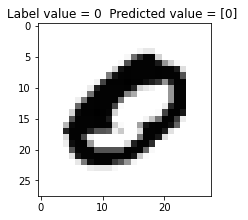

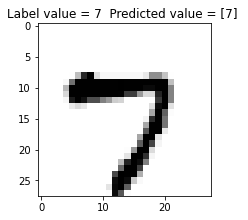

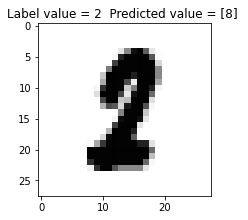

In [ ]:
# 9. 이미지를 랜덤으로 선택해 훈련된 모델로 예측 🖼
import numpy as np
for index in np.random.choice(len(y_test), 3, replace = False):
    test_image = X_test[index].reshape(1, 28, 28, 1)
    predicted = model.predict(test_image)
    label = y_test[index]
    result_label = np.where(label == np.amax(label))
    result_predicted = np.where(predicted == np.amax(predicted))
    title = "Label value = %s  Predicted value = %s " % (label, result_predicted[1])
    
    fig = plt.figure(1, figsize = (3,3))
    ax1 = fig.add_axes((0,0,.8,.8))
    ax1.set_title(title)
    images = X_test
    plt.imshow(images[index].reshape(28, 28), cmap = 'Greys', interpolation = 'nearest')
    plt.show()


In [ ]:
# 10. 학습 시각화하기


In [ ]:
from google.colab import files

upload = files.upload()

Saving 2.PNG to 2.PNG


In [ ]:
ls

2.PNG  sample_data/


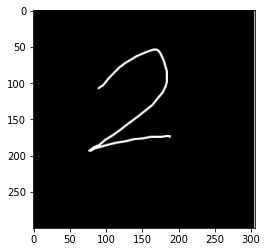

In [ ]:
import cv2

image = cv2.imread('2.PNG',cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap=plt.cm.gray)


In [ ]:
image_resized = cv2.resize(image, dsize=(28,28),
                           interpolation=cv2.INTER_AREA)

In [ ]:
image_reshaped = image_resized.reshape(28,28,1)
print(image_reshaped.shape)

(28, 28, 1)


In [ ]:
print(model.predict([image_reshaped.reshape(1,28,28,1)]))

[[0.         0.         0.00122057 0.         0.         0.
  0.         0.9987795  0.         0.        ]]
